In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Courses/CMPT 417/Final Project/s3_train3_csv.csv")
df = df.iloc[:,1:]
df.head()

,previous_state,current_state
0,"[[8, 4, 6], [1, 2, 3], [5, 7, 0]]","[[8, 4, 6], [1, 2, 0], [5, 7, 3]]"
1,"[[8, 4, 6], [1, 2, 3], [5, 7, 0]]","[[8, 4, 6], [1, 2, 3], [5, 0, 7]]"
2,"[[8, 4, 6], [1, 2, 0], [5, 7, 3]]","[[8, 4, 0], [1, 2, 6], [5, 7, 3]]"
3,"[[8, 4, 6], [1, 2, 3], [5, 0, 7]]","[[8, 4, 6], [1, 2, 3], [0, 5, 7]]"
4,"[[8, 4, 6], [1, 2, 0], [5, 7, 3]]","[[8, 4, 6], [1, 0, 2], [5, 7, 3]]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14241 entries, 0 to 14240
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   previous_state  14241 non-null  object
 1   current_state   14241 non-null  object
dtypes: object(2)
memory usage: 222.6+ KB


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Courses/CMPT 417/Final Project/s3_test2_csv.csv")
df_test = df_test.iloc[:,1:]
df_test.head()

,previous_state,current_state
0,"[[3, 6, 5], [1, 8, 7], [2, 4, 0]]","[[3, 6, 5], [1, 8, 0], [2, 4, 7]]"
1,"[[3, 6, 5], [1, 8, 7], [2, 4, 0]]","[[3, 6, 5], [1, 8, 7], [2, 0, 4]]"
2,"[[3, 6, 5], [1, 8, 0], [2, 4, 7]]","[[3, 6, 0], [1, 8, 5], [2, 4, 7]]"
3,"[[3, 6, 5], [1, 8, 0], [2, 4, 7]]","[[3, 6, 5], [1, 0, 8], [2, 4, 7]]"
4,"[[3, 6, 5], [1, 8, 7], [2, 0, 4]]","[[3, 6, 5], [1, 0, 7], [2, 8, 4]]"


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   previous_state  2270 non-null   object
 1   current_state   2270 non-null   object
dtypes: object(2)
memory usage: 35.6+ KB


In [ ]:
pList = []
cList = []
pList.append(df['previous_state'])
cList.append(df['current_state'])

In [ ]:
pList_test = []
cList_test = []
pList_test.append(df_test['previous_state'])
cList_test.append(df_test['current_state'])

In [ ]:
def flatten_list(configList):
  flatten_list = []
  for x in configList:
    for y in x: #this gets [[0, 1, 3], [7, 8, 2], [5, 4, 6]] [[0, 1, 3], [7, 8, 2], [5, 4, 6]]
      nested_list = []
      for s in y: #this gets every element as a string
        if s.isdigit():
          nested_list.append(int(s))
      flatten_list.append(nested_list)
  print(flatten_list)
  return flatten_list

In [ ]:
X = flatten_list(pList)
Y = flatten_list(cList)

X_test = flatten_list(pList_test)
Y_test = flatten_list(cList_test)

[[8, 4, 6, 1, 2, 3, 5, 7, 0], [8, 4, 6, 1, 2, 3, 5, 7, 0], [8, 4, 6, 1, 2, 0, 5, 7, 3], [8, 4, 6, 1, 2, 3, 5, 0, 7], [8, 4, 6, 1, 2, 0, 5, 7, 3], [8, 4, 6, 1, 2, 3, 5, 0, 7], [8, 4, 0, 1, 2, 6, 5, 7, 3], [8, 4, 6, 1, 2, 3, 0, 5, 7], [8, 4, 6, 1, 0, 2, 5, 7, 3], [8, 4, 6, 1, 0, 3, 5, 2, 7], [8, 4, 6, 1, 0, 2, 5, 7, 3], [8, 4, 6, 1, 0, 3, 5, 2, 7], [8, 4, 6, 1, 0, 3, 5, 2, 7], [8, 4, 6, 1, 0, 2, 5, 7, 3], [8, 4, 6, 0, 2, 3, 1, 5, 7], [8, 0, 4, 1, 2, 6, 5, 7, 3], [8, 0, 4, 1, 2, 6, 5, 7, 3], [8, 0, 6, 1, 4, 2, 5, 7, 3], [8, 0, 6, 1, 4, 3, 5, 2, 7], [8, 4, 6, 0, 2, 3, 1, 5, 7], [8, 0, 6, 1, 4, 2, 5, 7, 3], [8, 0, 6, 1, 4, 3, 5, 2, 7], [8, 4, 6, 0, 1, 2, 5, 7, 3], [8, 4, 6, 0, 1, 3, 5, 2, 7], [8, 4, 6, 1, 3, 0, 5, 2, 7], [8, 4, 6, 1, 7, 2, 5, 0, 3], [8, 4, 6, 0, 1, 2, 5, 7, 3], [8, 4, 6, 0, 1, 3, 5, 2, 7], [8, 4, 6, 1, 3, 0, 5, 2, 7], [8, 4, 6, 1, 7, 2, 5, 0, 3], [0, 8, 4, 1, 2, 6, 5, 7, 3], [0, 4, 6, 8, 2, 3, 1, 5, 7], [0, 8, 6, 1, 4, 2, 5, 7, 3], [0, 8, 6, 1, 4, 3, 5, 2, 7], [8, 2, 4, 1, 

In [ ]:
x = np.array(X)
x_test = np.array(X_test)

In [ ]:
x = pd.DataFrame(X)
x_test = pd.DataFrame(X_test)

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8
0,8,4,6,1,2,3,5,7,0
1,8,4,6,1,2,3,5,7,0
2,8,4,6,1,2,0,5,7,3
3,8,4,6,1,2,3,5,0,7
4,8,4,6,1,2,0,5,7,3


In [ ]:
y = np.array(Y)
y_test = np.array(Y_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
x_array = X_train.values
x_tensor = tf.convert_to_tensor(x_array)

Val_array = Val_train.values
Val_tensor = tf.convert_to_tensor(Val_array)

In [ ]:
y_tensor = tf.convert_to_tensor(y_train)
Val_y_tensor = tf.convert_to_tensor(Val_y_train)

In [ ]:
x_tensor = tf.reshape(x_tensor, (X_train.shape[0], X_train.shape[1], 1))  
Val_tensor = tf.reshape(Val_tensor, (Val_train.shape[0], Val_train.shape[1], 1))  

In [ ]:
y_tensor = tf.reshape(y_tensor, (y_train.shape[0],1 , y_train.shape[1]))  
Val_y_tensor = tf.reshape(Val_y_tensor, (Val_y_train.shape[0], 1, Val_y_train.shape[1]))  

In [ ]:
x_tensor[0].shape

TensorShape([9, 1])

In [ ]:
y_tensor[0].shape

TensorShape([1, 9])

In [ ]:
epochs = 20
model = tf.keras.Sequential()
model.add(layers.Conv1D(32, 2, activation='relu', input_shape=x_tensor[0].shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2)))

model.add(layers.Conv1D(64, 2, activation='relu'))
model.add(layers.Conv1D(64, 2, activation='relu'))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=(2), strides=(2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(32, activation='relu'))


model.add(layers.Dense(9, activation='softmax'))

model.add(layers.Reshape(( 1, 9)))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_75 (Conv1D)          (None, 8, 32)             96        
                                                                 
 batch_normalization_58 (Bat  (None, 8, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_57 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_76 (Conv1D)          (None, 3, 64)             4160      
                                                                 
 conv1d_77 (Conv1D)          (None, 2, 64)             8256      
                                                                 
 batch_normalization_59 (Bat  (None, 2, 64)          

> sparse_categorical_crossentropy is defined as categorical crossentropy with integer targets

In [ ]:
# train the model
history = model.fit(x_tensor, y_tensor, epochs=epochs, validation_data=(Val_tensor, Val_y_tensor), verbose=1)

Epoch 1/20
334/334 [==============================] - 4s 10ms/step - loss: 77.3971 - accuracy: 0.4066 - val_loss: 76.5498 - val_accuracy: 0.4875
Epoch 2/20
334/334 [==============================] - 2s 7ms/step - loss: 75.5709 - accuracy: 0.5201 - val_loss: 75.4209 - val_accuracy: 0.4628
Epoch 3/20
334/334 [==============================] - 2s 6ms/step - loss: 74.9553 - accuracy: 0.5330 - val_loss: 74.9065 - val_accuracy: 0.5557
Epoch 4/20
334/334 [==============================] - 2s 6ms/step - loss: 74.6532 - accuracy: 0.5442 - val_loss: 74.8148 - val_accuracy: 0.5571
Epoch 5/20
334/334 [==============================] - 2s 6ms/step - loss: 74.4764 - accuracy: 0.5487 - val_loss: 74.6375 - val_accuracy: 0.5209
Epoch 6/20
334/334 [==============================] - 3s 8ms/step - loss: 74.3835 - accuracy: 0.5575 - val_loss: 74.5095 - val_accuracy: 0.5204
Epoch 7/20
334/334 [==============================] - 2s 6ms/step - loss: 74.3065 - accuracy: 0.5615 - val_loss: 74.3678 - val_accuracy

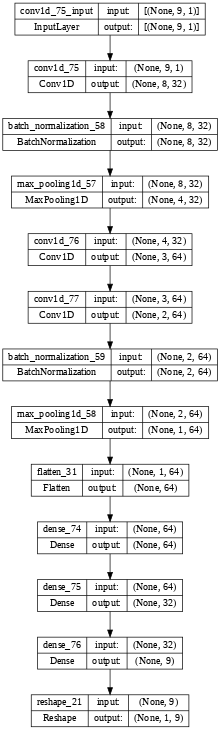

In [ ]:
tf.keras.utils.plot_model(model, '{}.png'.format(model.name), show_shapes=True, dpi =50)

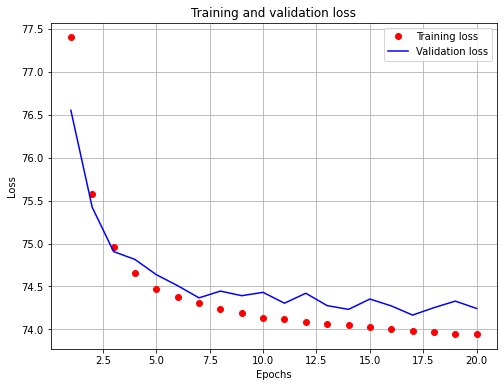

In [ ]:
# Plot the loss curves for training and validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, epochs + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

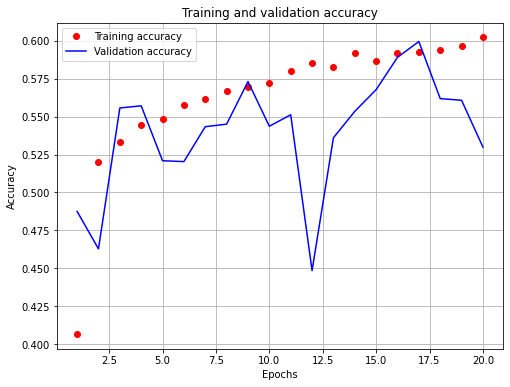

In [ ]:
# Plot the accuracy curves for training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 20 + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training accuracy', color='red')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [ ]:
test_array = x_test.values
test_tensor = tf.convert_to_tensor(test_array)

test_y_tensor = tf.convert_to_tensor(y_test)

In [ ]:
test_tensor = tf.reshape(test_tensor, (x_test.shape[0], x_test.shape[1], 1))  
test_y_tensor = tf.reshape(test_y_tensor, (y_test.shape[0], 1, y_test.shape[1]))  

In [ ]:
# Compute loss and accuracy for our testing dataset
evaluations = model.evaluate(test_tensor, test_y_tensor, verbose=1, return_dict=True)

print('Testing loss: {0:.6f}'.format(evaluations['loss']))
print('Testing accuracy: {0:.6f}'.format(evaluations['accuracy']))

71/71 [==============================] - 0s 3ms/step - loss: 74.3048 - accuracy: 0.5595
Testing loss: 74.304810
Testing accuracy: 0.559471


LSTM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, Val_train, y_train, Val_y_train = train_test_split(x, y, test_size=0.25, shuffle=False)

In [ ]:
x_array = X_train.values
x_tensor = tf.convert_to_tensor(x_array)

Val_array = Val_train.values
Val_tensor = tf.convert_to_tensor(Val_array)

In [ ]:
y_tensor = tf.convert_to_tensor(y_train)
Val_y_tensor = tf.convert_to_tensor(Val_y_train)

In [ ]:
x_tensor = tf.reshape(x_tensor, (X_train.shape[0], X_train.shape[1], 1))  
Val_tensor = tf.reshape(Val_tensor, (Val_train.shape[0], Val_train.shape[1], 1))  

In [ ]:
y_tensor = tf.reshape(y_tensor, (y_train.shape[0],1 , y_train.shape[1]))  
Val_y_tensor = tf.reshape(Val_y_tensor, (Val_y_train.shape[0], 1, Val_y_train.shape[1]))  

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, MaxPooling1D

In [ ]:
epochs = 20

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=x_tensor[0].shape, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(layers.Dense(9, activation='softmax'))
model.add(layers.Reshape(( 1, 9)))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 9, 128)            66560     
                                                                 
 batch_normalization_77 (Bat  (None, 9, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 9, 128)            0         
                                                                 
 lstm_30 (LSTM)              (None, 128)               131584    
                                                                 
 batch_normalization_78 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_19 (Dropout)        (None, 128)             

In [ ]:
# train the model
history = model.fit(x_tensor, y_tensor, epochs=epochs, validation_data=(Val_tensor, Val_y_tensor), verbose=1)

Epoch 1/20
334/334 [==============================] - 7s 11ms/step - loss: 82.8699 - accuracy: 0.2305 - val_loss: 78.2644 - val_accuracy: 0.3527
Epoch 2/20
334/334 [==============================] - 3s 9ms/step - loss: 78.3767 - accuracy: 0.3528 - val_loss: 76.5759 - val_accuracy: 0.5807
Epoch 3/20
334/334 [==============================] - 3s 9ms/step - loss: 76.6275 - accuracy: 0.4427 - val_loss: 75.6835 - val_accuracy: 0.5541
Epoch 4/20
334/334 [==============================] - 3s 9ms/step - loss: 75.3525 - accuracy: 0.5018 - val_loss: 74.4844 - val_accuracy: 0.5498
Epoch 5/20
334/334 [==============================] - 3s 9ms/step - loss: 74.6551 - accuracy: 0.5076 - val_loss: 74.2297 - val_accuracy: 0.6338
Epoch 6/20
334/334 [==============================] - 3s 10ms/step - loss: 74.4418 - accuracy: 0.5129 - val_loss: 74.2551 - val_accuracy: 0.5782
Epoch 7/20
334/334 [==============================] - 5s 15ms/step - loss: 74.3600 - accuracy: 0.5184 - val_loss: 74.0347 - val_accura

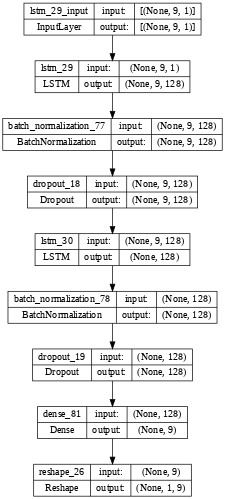

In [ ]:
tf.keras.utils.plot_model(model, '{}.png'.format(model.name), show_shapes=True, dpi =50)

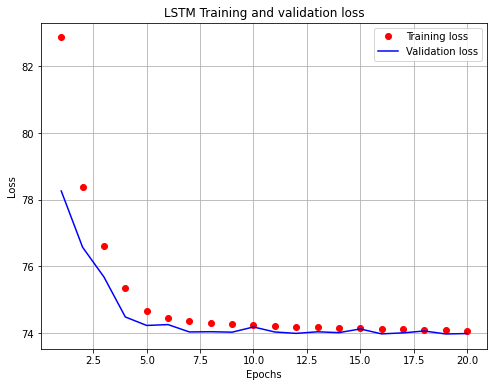

In [ ]:
# Plot the loss curves for training and validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 20 + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('LSTM Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

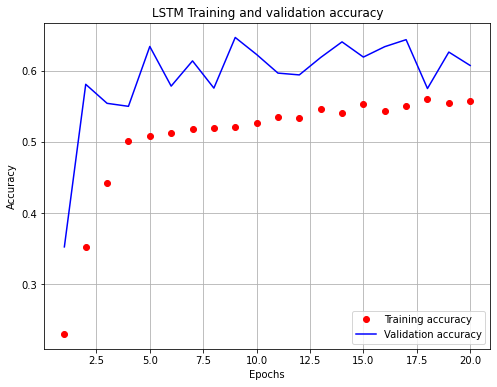

In [ ]:
# Plot the accuracy curves for training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, 20 + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc, 'bo', label='Training accuracy', color='red')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('LSTM Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [ ]:
test_array = x_test.values
test_tensor = tf.convert_to_tensor(test_array)

test_y_tensor = tf.convert_to_tensor(y_test)

In [ ]:
test_tensor = tf.reshape(test_tensor, (x_test.shape[0], x_test.shape[1], 1))  
test_y_tensor = tf.reshape(test_y_tensor, (y_test.shape[0], 1, y_test.shape[1]))  

In [ ]:
# Compute loss and accuracy for our testing dataset
evaluations = model.evaluate(test_tensor, test_y_tensor, verbose=1, return_dict=True)

print('Testing loss: {0:.6f}'.format(evaluations['loss']))
print('Testing accuracy: {0:.6f}'.format(evaluations['accuracy']))

71/71 [==============================] - 0s 4ms/step - loss: 74.0039 - accuracy: 0.6062
Testing loss: 74.003922
Testing accuracy: 0.606167
